In [ ]:

!unzip fashion-mnist-master.zip

Archive:  fashion-mnist-master.zip
b2617bb6d3ffa2e429640350f613e3291e10b141
   creating: fashion-mnist-master/
  inflating: fashion-mnist-master/.catwatch.yaml  
 extracting: fashion-mnist-master/.dockerignore  
  inflating: fashion-mnist-master/.gitignore  
  inflating: fashion-mnist-master/.zappr.yaml  
  inflating: fashion-mnist-master/CONTRIBUTING.md  
  inflating: fashion-mnist-master/Dockerfile  
  inflating: fashion-mnist-master/LICENSE  
  inflating: fashion-mnist-master/MAINTAINERS  
  inflating: fashion-mnist-master/README.ja.md  
  inflating: fashion-mnist-master/README.md  
  inflating: fashion-mnist-master/README.zh-CN.md  
  inflating: fashion-mnist-master/app.py  
   creating: fashion-mnist-master/benchmark/
 extracting: fashion-mnist-master/benchmark/__init__.py  
  inflating: fashion-mnist-master/benchmark/baselines.json  
  inflating: fashion-mnist-master/benchmark/convnet.py  
  inflating: fashion-mnist-master/benchmark/runner.py  
  inflating: fashion-mnist-master/c

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix


# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names (optional, but helpful for visualization)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension for CNN
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Split the training data into training and validation sets
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

In [ ]:
# Display the shape of the datasets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Training images shape: (55000, 28, 28, 1)
Training labels shape: (55000,)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000,)
Validation images shape: (5000, 28, 28, 1)
Validation labels shape: (5000,)


In [ ]:
# Display the data type of the images and labels
print("Training images data type:", train_images.dtype)
print("Training labels data type:", train_labels.dtype)

Training images data type: float64
Training labels data type: uint8


In [ ]:
# Display the number of unique classes in the training labels
num_classes = len(np.unique(train_labels))
print("Number of classes:", num_classes)

# Display the unique class labels
print("Class labels:", np.unique(train_labels))

Number of classes: 10
Class labels: [0 1 2 3 4 5 6 7 8 9]


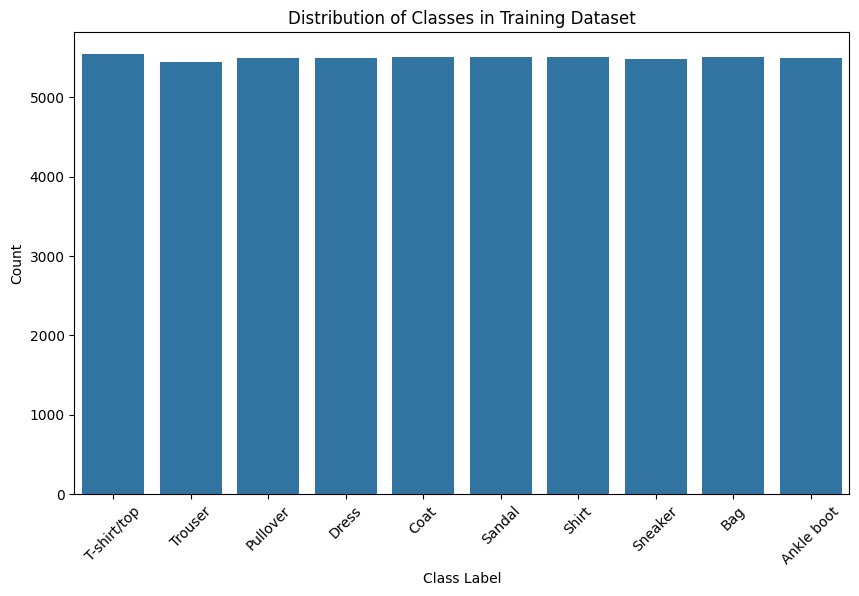

In [ ]:
# Visualize the distribution of classes in the training set
plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels)
plt.title('Distribution of Classes in Training Dataset')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.show()

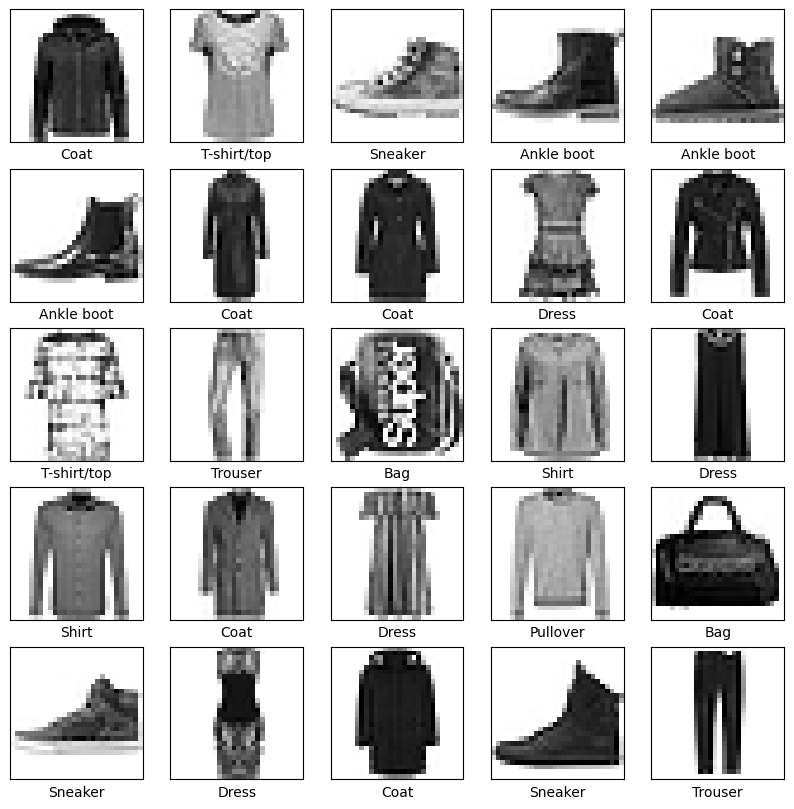

In [ ]:
# Visualize some sample images with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Build the ANN model
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the ANN model
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

epochs_list = [10, 20, 30, 40, 50]
ann_accuracies = []

for epochs in epochs_list:
    print(f"\nTraining ANN model for {epochs} epochs...")
    # Train the ANN model
    history_ann = ann_model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

    # Evaluate the ANN model on the test set
    test_loss_ann, test_acc_ann = ann_model.evaluate(test_images, test_labels, verbose=0)
    print(f'ANN Test accuracy after {epochs} epochs:', test_acc_ann)
    ann_accuracies.append({'Epochs': epochs, 'Test Accuracy': test_acc_ann})

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training ANN model for 10 epochs...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7786 - loss: 0.6371 - val_accuracy: 0.8578 - val_loss: 0.4033
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8601 - loss: 0.3916 - val_accuracy: 0.8754 - val_loss: 0.3496
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8715 - loss: 0.3522 - val_accuracy: 0.8774 - val_loss: 0.3353
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8800 - loss: 0.3254 - val_accuracy: 0.8804 - val_loss: 0.3276
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8885 - loss: 0.3035 - val_accuracy: 0.8650 - val_loss: 0.3677
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8931 - loss: 0.2853 - val_accuracy: 0.8836 - val_loss: 0.3272
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8990 - loss: 0.2744 - val_accuracy: 0.8900 - val_loss: 0.3115
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/st

In [ ]:
# Build the CNN model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

epochs_list = [10, 20, 30, 40, 50]
cnn_accuracies = []

for epochs in epochs_list:
    print(f"\nTraining CNN model for {epochs} epochs...")
    # Train the CNN model
    history_cnn = cnn_model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

    # Evaluate the CNN model on the test set
    test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_images, test_labels, verbose=0)
    print(f'CNN Test accuracy after {epochs} epochs:', test_acc_cnn)
    cnn_accuracies.append({'Epochs': epochs, 'Test Accuracy': test_acc_cnn})

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN model for 10 epochs...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.7322 - loss: 0.7267 - val_accuracy: 0.8744 - val_loss: 0.3496
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.8722 - loss: 0.3438 - val_accuracy: 0.8910 - val_loss: 0.2968
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.8951 - loss: 0.2846 - val_accuracy: 0.9018 - val_loss: 0.2622
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9076 - loss: 0.2489 - val_accuracy: 0.9048 - val_loss: 0.2509
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9162 - loss: 0.2249 - val_accuracy: 0.9038 - val_loss: 0.2579
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9265 - loss: 0.1979 - val_accuracy: 0.9086 - val_loss: 0.2510
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9317 - loss: 0.1801 - val_accuracy: 0.9124 - val_loss: 0.2451
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━

In [ ]:

# Create DataFrames from the collected accuracies
ann_accuracy_df = pd.DataFrame(ann_accuracies)
cnn_accuracy_df = pd.DataFrame(cnn_accuracies)

# Add a 'Model' column to each DataFrame
ann_accuracy_df['Model'] = 'ANN'
cnn_accuracy_df['Model'] = 'CNN'

# Combine the DataFrames
all_accuracies_df = pd.concat([ann_accuracy_df, cnn_accuracy_df])

# Pivot the table to have Epochs as rows and Models as columns
pivot_accuracies_df = all_accuracies_df.pivot(index='Epochs', columns='Model', values='Test Accuracy')

print("Test Accuracies per Epoch:")
display(pivot_accuracies_df)

Test Accuracies per Epoch:


Model,ANN,CNN
Epochs,,
10,0.8782,0.9032
20,0.8852,0.9025
30,0.8808,0.9076
40,0.8849,0.9056
50,0.8774,0.9015


In [ ]:
# Find the best ANN accuracy and epoch
best_ann_accuracy_row = ann_accuracy_df.loc[ann_accuracy_df['Test Accuracy'].idxmax()]
best_ann_accuracy = best_ann_accuracy_row['Test Accuracy']
best_ann_epochs = best_ann_accuracy_row['Epochs']

# Find the best CNN accuracy and epoch
best_cnn_accuracy_row = cnn_accuracy_df.loc[cnn_accuracy_df['Test Accuracy'].idxmax()]
best_cnn_accuracy = best_cnn_accuracy_row['Test Accuracy']
best_cnn_epochs = best_cnn_accuracy_row['Epochs']

print(f"Best ANN Test Accuracy: {best_ann_accuracy:.4f} achieved at {best_ann_epochs} epochs")
print(f"Best CNN Test Accuracy: {best_cnn_accuracy:.4f} achieved at {best_cnn_epochs} epochs")

Best ANN Test Accuracy: 0.8852 achieved at 20 epochs
Best CNN Test Accuracy: 0.9076 achieved at 30 epochs


In [ ]:

# Convert confusion matrices to DataFrames for easier analysis
ann_cm_df = pd.DataFrame(ann_cm, index=class_names, columns=class_names)
cnn_cm_df = pd.DataFrame(cnn_cm, index=class_names, columns=class_names)

print("ANN Confusion Matrix Analysis:")
# Identify pairs with high confusion (off-diagonal elements) for ANN
# You can adjust the threshold for 'high confusion' based on your needs
high_confusion_ann = ann_cm_df[ann_cm_df > 50].stack().sort_values(ascending=False)
# Filter out self-predictions (diagonal)
high_confusion_ann = high_confusion_ann[high_confusion_ann.index.get_level_values(0) != high_confusion_ann.index.get_level_values(1)]
print("Highly Confused Pairs (ANN):")
print(high_confusion_ann)

print("\nCNN Confusion Matrix Analysis:")
# Identify pairs with high confusion (off-diagonal elements) for CNN
high_confusion_cnn = cnn_cm_df[cnn_cm_df > 50].stack().sort_values(ascending=False)
# Filter out self-predictions (diagonal)
high_confusion_cnn = high_confusion_cnn[high_confusion_cnn.index.get_level_values(0) != high_confusion_cnn.index.get_level_values(1)]
print("Highly Confused Pairs (CNN):")
print(high_confusion_cnn)

# You can further analyze specific pairs, for example, confusion between Shirt and T-shirt/top
print("\nConfusion between Shirt and T-shirt/top (ANN):")
print(f"True Shirt predicted as T-shirt/top: {ann_cm_df.loc['Shirt', 'T-shirt/top']}")
print(f"True T-shirt/top predicted as Shirt: {ann_cm_df.loc['T-shirt/top', 'Shirt']}")

print("\nConfusion between Shirt and T-shirt/top (CNN):")
print(f"True Shirt predicted as T-shirt/top: {cnn_cm_df.loc['Shirt', 'T-shirt/top']}")
print(f"True T-shirt/top predicted as Shirt: {cnn_cm_df.loc['T-shirt/top', 'Shirt']}")

ANN Confusion Matrix Analysis:
Highly Confused Pairs (ANN):
Pullover     Coat           158.0
Shirt        T-shirt/top    134.0
             Coat            95.0
T-shirt/top  Shirt           86.0
Pullover     Shirt           82.0
Shirt        Pullover        61.0
Dress        Coat            59.0
Sneaker      Ankle boot      57.0
dtype: float64

CNN Confusion Matrix Analysis:
Highly Confused Pairs (CNN):
Shirt        T-shirt/top    128.0
             Coat            89.0
Pullover     Coat            84.0
             Shirt           83.0
T-shirt/top  Shirt           79.0
Coat         Shirt           56.0
Dress        Coat            53.0
dtype: float64

Confusion between Shirt and T-shirt/top (ANN):
True Shirt predicted as T-shirt/top: 134
True T-shirt/top predicted as Shirt: 86

Confusion between Shirt and T-shirt/top (CNN):
True Shirt predicted as T-shirt/top: 128
True T-shirt/top predicted as Shirt: 79


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


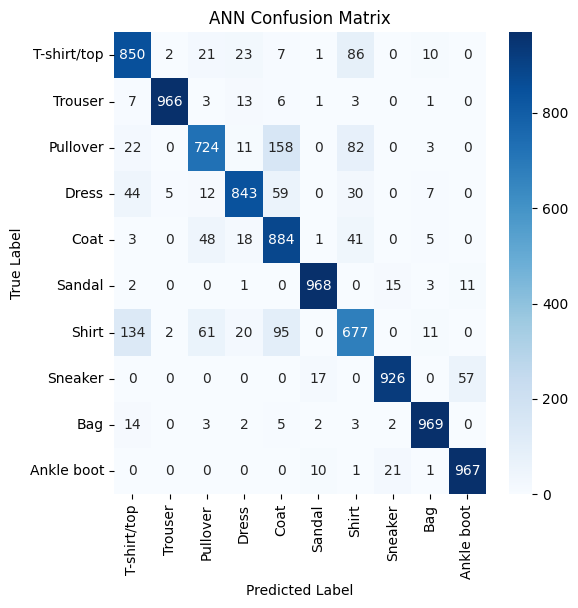

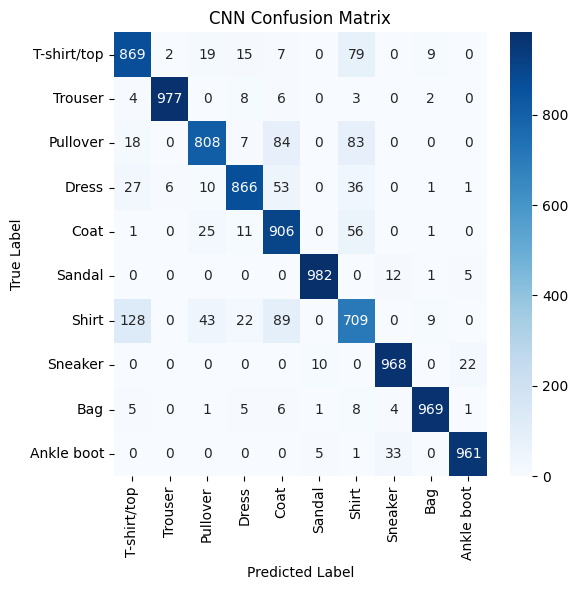

In [ ]:

# Get predictions for the test set
ann_predictions = np.argmax(ann_model.predict(test_images), axis=-1)
cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=-1)

# Generate confusion matrices
ann_cm = confusion_matrix(test_labels, ann_predictions)
cnn_cm = confusion_matrix(test_labels, cnn_predictions)

# Plot ANN confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ANN Confusion Matrix')

# Plot CNN confusion matrix
plt.figure(figsize=(6, 6)) # Reduced figure size for a single plot

sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')

plt.tight_layout()
plt.show()

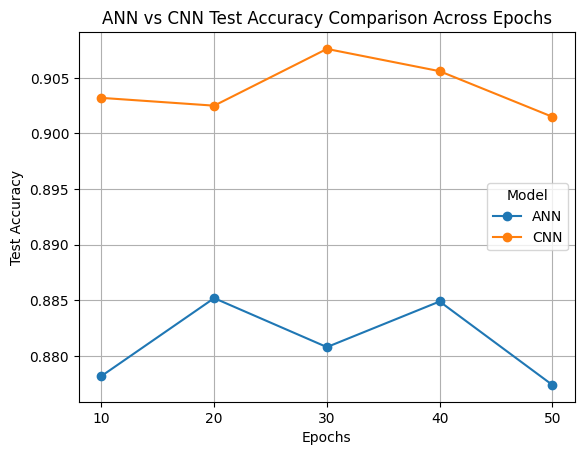

In [ ]:
# Plot the line graph comparing ANN and CNN accuracies
pivot_accuracies_df.plot(kind='line', marker='o')
plt.title('ANN vs CNN Test Accuracy Comparison Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(pivot_accuracies_df.index) # Ensure all epochs are shown on the x-axis
plt.legend(title='Model')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
ANN Predictions:
Image 0: Predicted: Ankle boot, True: Ankle boot
Image 1: Predicted: Pullover, True: Pullover
Image 2: Predicted: Trouser, True: Trouser
Image 3: Predicted: Trouser, True: Trouser
Image 4: Predicted: T-shirt/top, True: Shirt

CNN Predictions:
Image 0: Predicted: Ankle boot, True: Ankle boot
Image 1: Predicted: Pullover, True: Pullover
Image 2: Predicted: Trouser, True: Trouser
Image 3: Predicted: Trouser, True: Trouser
Image 4: Predicted: Shirt, True: Shirt


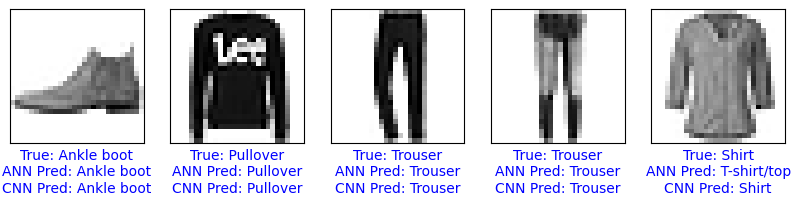

In [ ]:
# Make predictions on a few test images
predictions_ann = ann_model.predict(test_images[:5])
predictions_cnn = cnn_model.predict(test_images[:5])

print("ANN Predictions:")
for i in range(5):
    predicted_label_ann = np.argmax(predictions_ann[i])
    true_label = test_labels[i]
    print(f"Image {i}: Predicted: {class_names[predicted_label_ann]}, True: {class_names[true_label]}")

print("\nCNN Predictions:")
for i in range(5):
    predicted_label_cnn = np.argmax(predictions_cnn[i])
    true_label = test_labels[i]
    print(f"Image {i}: Predicted: {class_names[predicted_label_cnn]}, True: {class_names[true_label]}")

# Visualize the predictions
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].squeeze(), cmap=plt.cm.binary)
    predicted_label_ann = np.argmax(predictions_ann[i])
    predicted_label_cnn = np.argmax(predictions_cnn[i])
    true_label = test_labels[i]
    color = 'blue' if predicted_label_cnn == true_label else 'red' # Use CNN prediction for color
    plt.xlabel(f"True: {class_names[true_label]}\nANN Pred: {class_names[predicted_label_ann]}\nCNN Pred: {class_names[predicted_label_cnn]}", color=color)
plt.show()

In [ ]:
#Different Learning rates

In [ ]:
# Build the ANN model
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Different learning rates to test
learning_rates = [0.01, 0.001, 0.0001]
ann_accuracies = []
epochs = 20  # Fixed epochs

for learning_rate in learning_rates:
    print(f"\nTraining ANN model with learning rate: {learning_rate} for {epochs} epochs...")
    # Compile the ANN model with the current learning rate
    ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the ANN model
    history_ann = ann_model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

    # Evaluate the ANN model on the test set
    test_loss_ann, test_acc_ann = ann_model.evaluate(test_images, test_labels, verbose=0)
    print(f'ANN Test accuracy with learning rate {learning_rate}:', test_acc_ann)
    ann_accuracies.append({'Learning Rate': learning_rate, 'Test Accuracy': test_acc_ann})

print("\nResults:")
for result in ann_accuracies:
    print(f"Learning Rate: {result['Learning Rate']}, Test Accuracy: {result['Test Accuracy']}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training ANN model with learning rate: 0.01 for 20 epochs...
Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7700 - loss: 0.6962 - val_accuracy: 0.8074 - val_loss: 0.5414
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8411 - loss: 0.4440 - val_accuracy: 0.8508 - val_loss: 0.4499
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8511 - loss: 0.4184 - val_accuracy: 0.8644 - val_loss: 0.4158
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8547 - loss: 0.4043 - val_accuracy: 0.8582 - val_loss: 0.4256
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8597 - loss: 0.3914 - val_accuracy: 0.8452 - val_loss: 0.4391
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8625 - loss: 0.3877 - val_accuracy: 0.8656 - val_loss: 0.3976
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8675 - loss: 0.3720 - val_accuracy: 0.8724 - val_loss: 0.4030
Epoch 8/20
1719/1719 ━━━━━━━

In [ ]:
# Build the CNN model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Different learning rates to test
learning_rates = [0.01, 0.001, 0.0001]
cnn_accuracies = []
epochs = 30  # Fixed epochs

for learning_rate in learning_rates:
    print(f"\nTraining CNN model with learning rate: {learning_rate} for {epochs} epochs...")
    # Compile the CNN model with the current learning rate
    cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the CNN model
    history_cnn = cnn_model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

    # Evaluate the CNN model on the test set
    test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_images, test_labels, verbose=0)
    print(f'CNN Test accuracy with learning rate {learning_rate}:', test_acc_cnn)
    cnn_accuracies.append({'Learning Rate': learning_rate, 'Test Accuracy': test_acc_cnn})

print("\nResults:")
for result in cnn_accuracies:
    print(f"Learning Rate: {result['Learning Rate']}, Test Accuracy: {result['Test Accuracy']}")


Training CNN model with learning rate: 0.01 for 30 epochs...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.7161 - loss: 0.7574 - val_accuracy: 0.8308 - val_loss: 0.4536
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.8440 - loss: 0.4148 - val_accuracy: 0.8622 - val_loss: 0.3737
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8529 - loss: 0.3909 - val_accuracy: 0.8408 - val_loss: 0.4218
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.8562 - loss: 0.3851 - val_accuracy: 0.8602 - val_loss: 0.3753
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.8604 - loss: 0.3775 - val_accuracy: 0.8528 - val_loss: 0.4090
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.8635 - loss: 0.3704 - val_accuracy: 0.8630 - val_loss: 0.3762
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.8616 - loss: 0.3724 - val_accuracy: 0.8552 - val_loss: 0.3877
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.8653 -

In [ ]:
import pandas as pd

# Create DataFrames from the collected accuracies (assuming ann_accuracies and cnn_accuracies are populated with learning rate results)
ann_accuracy_df_lr = pd.DataFrame(ann_accuracies)
cnn_accuracy_df_lr = pd.DataFrame(cnn_accuracies)

# Add a 'Model' column to each DataFrame
ann_accuracy_df_lr['Model'] = 'ANN'
cnn_accuracy_df_lr['Model'] = 'CNN'

# Combine the DataFrames
all_accuracies_df_lr = pd.concat([ann_accuracy_df_lr, cnn_accuracy_df_lr])

# Pivot the table to have Learning Rate as rows and Models as columns
pivot_accuracies_df_lr = all_accuracies_df_lr.pivot(index='Learning Rate', columns='Model', values='Test Accuracy')

print("Test Accuracies per Learning Rate:")
display(pivot_accuracies_df_lr)

Test Accuracies per Learning Rate:


Model,ANN,CNN
Learning Rate,,
0.0001,0.8652,0.8727
0.0010,0.8625,0.8741
0.0100,0.8554,0.8487


In [ ]:
# Find the best ANN accuracy and learning rate
best_ann_accuracy_row_lr = ann_accuracy_df_lr.loc[ann_accuracy_df_lr['Test Accuracy'].idxmax()]
best_ann_accuracy_lr = best_ann_accuracy_row_lr['Test Accuracy']
best_ann_learning_rate = best_ann_accuracy_row_lr['Learning Rate']

# Find the best CNN accuracy and learning rate
best_cnn_accuracy_row_lr = cnn_accuracy_df_lr.loc[cnn_accuracy_df_lr['Test Accuracy'].idxmax()]
best_cnn_accuracy_lr = best_cnn_accuracy_row_lr['Test Accuracy']
best_cnn_learning_rate = best_cnn_accuracy_row_lr['Learning Rate']

print(f"Best ANN Test Accuracy: {best_ann_accuracy_lr:.4f} achieved with learning rate {best_ann_learning_rate}")
print(f"Best CNN Test Accuracy: {best_cnn_accuracy_lr:.4f} achieved with learning rate {best_cnn_learning_rate}")

Best ANN Test Accuracy: 0.8652 achieved with learning rate 0.0001
Best CNN Test Accuracy: 0.8741 achieved with learning rate 0.001


In [ ]:
#Different Dense Units

In [ ]:
# Build the ANN model
# Different dense units to test
dense_units_list = [64, 128, 256]
ann_accuracies_dense = []
epochs = 20  # Fixed epochs
learning_rate = 0.0001 # Fixed learning rate

for dense_units in dense_units_list:
    print(f"\nTraining ANN model with dense units: {dense_units} for {epochs} epochs and learning rate {learning_rate}...")
    ann_model_dense = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28, 1)),
        keras.layers.Dense(dense_units, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the ANN model with the fixed learning rate
    ann_model_dense.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the ANN model
    history_ann_dense = ann_model_dense.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

    # Evaluate the ANN model on the test set
    test_loss_ann_dense, test_acc_ann_dense = ann_model_dense.evaluate(test_images, test_labels, verbose=0)
    print(f'ANN Test accuracy with {dense_units} dense units:', test_acc_ann_dense)
    ann_accuracies_dense.append({'Dense Units': dense_units, 'Test Accuracy': test_acc_ann_dense})

print("\nResults:")
for result in ann_accuracies_dense:
    print(f"Dense Units: {result['Dense Units']}, Test Accuracy: {result['Test Accuracy']}")


Training ANN model with dense units: 64 for 20 epochs and learning rate 0.0001...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6293 - loss: 1.1820 - val_accuracy: 0.8234 - val_loss: 0.5576
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8235 - loss: 0.5382 - val_accuracy: 0.8408 - val_loss: 0.4804
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8372 - loss: 0.4821 - val_accuracy: 0.8512 - val_loss: 0.4501
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8453 - loss: 0.4472 - val_accuracy: 0.8550 - val_loss: 0.4261
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8517 - loss: 0.4270 - val_accuracy: 0.8598 - val_loss: 0.4151
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8570 - loss: 0.4139 - val_accuracy: 0.8608 - val_loss: 0.4053
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8630 - loss: 0.3983 - val_accuracy: 0.8650 - val_loss: 0.3966
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8644 - loss: 0.3908 -

In [ ]:
# Build the CNN model
# Different dense units to test
dense_units_list = [64, 128, 256]
cnn_accuracies_dense = []
epochs = 30  # Fixed epochs
learning_rate = 0.001 # Fixed learning rate

for dense_units in dense_units_list:
    print(f"\nTraining CNN model with dense units: {dense_units} for {epochs} epochs and learning rate {learning_rate}...")
    cnn_model_dense = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(dense_units, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the CNN model with the fixed learning rate
    cnn_model_dense.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the CNN model
    history_cnn_dense = cnn_model_dense.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

    # Evaluate the CNN model on the test set
    test_loss_cnn_dense, test_acc_cnn_dense = cnn_model_dense.evaluate(test_images, test_labels, verbose=0)
    print(f'CNN Test accuracy with {dense_units} dense units:', test_acc_cnn_dense)
    cnn_accuracies_dense.append({'Dense Units': dense_units, 'Test Accuracy': test_acc_cnn_dense})

print("\nResults:")
for result in cnn_accuracies_dense:
    print(f"Dense Units: {result['Dense Units']}, Test Accuracy: {result['Test Accuracy']}")


Training CNN model with dense units: 64 for 30 epochs and learning rate 0.001...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.7349 - loss: 0.7231 - val_accuracy: 0.8742 - val_loss: 0.3539
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.8791 - loss: 0.3333 - val_accuracy: 0.8888 - val_loss: 0.3027
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.8983 - loss: 0.2806 - val_accuracy: 0.9010 - val_loss: 0.2811
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9062 - loss: 0.2529 - val_accuracy: 0.9046 - val_loss: 0.2572
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9192 - loss: 0.2200 - val_accuracy: 0.9088 - val_loss: 0.2399
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.9258 - loss: 0.2006 - val_accuracy: 0.9124 - val_loss: 0.2428
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9325 - loss: 0.1813 - val_accuracy: 0.9178 - val_loss: 0.2366
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9351 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 34ms/step - accuracy: 0.7431 - loss: 0.7037 - val_accuracy: 0.8706 - val_loss: 0.3553
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.8774 - loss: 0.3368 - val_accuracy: 0.8798 - val_loss: 0.3142
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.8938 - loss: 0.2871 - val_accuracy: 0.8988 - val_loss: 0.2652
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9089 - loss: 0.2472 - val_accuracy: 0.9076 - val_loss: 0.2534
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9172 - loss: 0.2226 - val_accuracy: 0.9138 - val_loss: 0.2372
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.9242 - loss: 0.2032 - val_accuracy: 0.9132 - val_loss: 0.2399
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.9299 - loss: 0.1818 - val_accuracy: 0.9114 - val_loss: 0.2520
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9405 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.7533 - loss: 0.6660 - val_accuracy: 0.8744 - val_loss: 0.3469
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.8823 - loss: 0.3207 - val_accuracy: 0.8974 - val_loss: 0.2809
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9007 - loss: 0.2693 - val_accuracy: 0.8896 - val_loss: 0.2828
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.9154 - loss: 0.2295 - val_accuracy: 0.9114 - val_loss: 0.2312
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9230 - loss: 0.2059 - val_accuracy: 0.9106 - val_loss: 0.2467
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9310 - loss: 0.1828 - val_accuracy: 0.9096 - val_loss: 0.2445
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9392 - loss: 0.1644 - val_accuracy: 0.9096 - val_loss: 0.2481
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9443 -

In [ ]:
import pandas as pd

# Create DataFrames from the collected accuracies (assuming ann_accuracies_dense and cnn_accuracies_dense are populated with dense unit results)
ann_accuracy_df_dense = pd.DataFrame(ann_accuracies_dense)
cnn_accuracy_df_dense = pd.DataFrame(cnn_accuracies_dense)

# Add a 'Model' column to each DataFrame
ann_accuracy_df_dense['Model'] = 'ANN'
cnn_accuracy_df_dense['Model'] = 'CNN'

# Combine the DataFrames
all_accuracies_df_dense = pd.concat([ann_accuracy_df_dense, cnn_accuracy_df_dense])

# Pivot the table to have Dense Units as rows and Models as columns
pivot_accuracies_df_dense = all_accuracies_df_dense.pivot(index='Dense Units', columns='Model', values='Test Accuracy')

print("Test Accuracies per Dense Unit:")
display(pivot_accuracies_df_dense)

Test Accuracies per Dense Unit:


Model,ANN,CNN
Dense Units,,
64,0.8627,0.9035
128,0.8760,0.9047
256,0.8821,0.9067


In [ ]:
# Find the best ANN accuracy and dense units
best_ann_accuracy_row_dense = ann_accuracy_df_dense.loc[ann_accuracy_df_dense['Test Accuracy'].idxmax()]
best_ann_accuracy_dense = best_ann_accuracy_row_dense['Test Accuracy']
best_ann_dense_units = best_ann_accuracy_row_dense['Dense Units']

# Find the best CNN accuracy and dense units
best_cnn_accuracy_row_dense = cnn_accuracy_df_dense.loc[cnn_accuracy_df_dense['Test Accuracy'].idxmax()]
best_cnn_accuracy_dense = best_cnn_accuracy_row_dense['Test Accuracy']
best_cnn_dense_units = best_cnn_accuracy_row_dense['Dense Units']

print(f"Best ANN Test Accuracy: {best_ann_accuracy_dense:.4f} achieved with {best_ann_dense_units} dense units")
print(f"Best CNN Test Accuracy: {best_cnn_accuracy_dense:.4f} achieved with {best_cnn_dense_units} dense units")

Best ANN Test Accuracy: 0.8821 achieved with 256 dense units
Best CNN Test Accuracy: 0.9067 achieved with 256 dense units


In [ ]:
#Different Activation Functions

In [ ]:
# Different activation functions to test
activation_functions = ['relu', 'tanh', 'sigmoid'] # Add more if desired, e.g., 'elu', LeakyReLU
ann_accuracies_activation = []
epochs = 20  # Fixed epochs
learning_rate = 0.0001 # Fixed learning rate
dense_units = 256 # Fixed dense units

for activation in activation_functions:
    print(f"\nTraining ANN model with activation function: {activation} for {epochs} epochs, learning rate {learning_rate}, and {dense_units} dense units...")
    ann_model_activation = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28, 1)),
        keras.layers.Dense(dense_units, activation=activation),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the ANN model with the fixed learning rate
    ann_model_activation.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the ANN model
    history_ann_activation = ann_model_activation.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

    # Evaluate the ANN model on the test set
    test_loss_ann_activation, test_acc_ann_activation = ann_model_activation.evaluate(test_images, test_labels, verbose=0)
    print(f'ANN Test accuracy with {activation} activation:', test_acc_ann_activation)
    ann_accuracies_activation.append({'Activation Function': activation, 'Test Accuracy': test_acc_ann_activation})

print("\nResults:")
for result in ann_accuracies_activation:
    print(f"Activation Function: {result['Activation Function']}, Test Accuracy: {result['Test Accuracy']}")


Training ANN model with activation function: relu for 20 epochs, learning rate 0.0001, and 256 dense units...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7120 - loss: 0.9090 - val_accuracy: 0.8414 - val_loss: 0.4790
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8414 - loss: 0.4695 - val_accuracy: 0.8628 - val_loss: 0.4195
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8573 - loss: 0.4147 - val_accuracy: 0.8670 - val_loss: 0.3925
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8664 - loss: 0.3867 - val_accuracy: 0.8660 - val_loss: 0.3896
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8713 - loss: 0.3654 - val_accuracy: 0.8718 - val_loss: 0.3702
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8782 - loss: 0.3548 - val_accuracy: 0.8786 - val_loss: 0.3496
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8794 - loss: 0.3430 - val_accuracy: 0.8776 - val_loss: 0.3422
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8843 - loss: 0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7226 - loss: 0.8616 - val_accuracy: 0.8436 - val_loss: 0.4684
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8392 - loss: 0.4642 - val_accuracy: 0.8518 - val_loss: 0.4347
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8529 - loss: 0.4162 - val_accuracy: 0.8610 - val_loss: 0.3967
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8627 - loss: 0.3907 - val_accuracy: 0.8652 - val_loss: 0.3832
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8649 - loss: 0.3783 - val_accuracy: 0.8668 - val_loss: 0.3747
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8729 - loss: 0.3582 - val_accuracy: 0.8712 - val_loss: 0.3677
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8740 - loss: 0.3517 - val_accuracy: 0.8746 - val_loss: 0.3540
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8775 - loss: 0.

In [ ]:
# Different activation functions to test
activation_functions = ['relu', 'tanh', 'sigmoid'] # Add more if desired, e.g., 'elu', LeakyReLU
cnn_accuracies_activation = []
epochs = 30  # Fixed epochs
learning_rate = 0.001 # Fixed learning rate
dense_units = 256 # Fixed dense units

for activation in activation_functions:
    print(f"\nTraining CNN model with activation function: {activation} for {epochs} epochs, learning rate {learning_rate}, and {dense_units} dense units...")
    cnn_model_activation = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(dense_units, activation=activation),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the CNN model with the fixed learning rate
    cnn_model_activation.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the CNN model
    history_cnn_activation = cnn_model_activation.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

    # Evaluate the CNN model on the test set
    test_loss_cnn_activation, test_acc_cnn_activation = cnn_model_activation.evaluate(test_images, test_labels, verbose=0)
    print(f'CNN Test accuracy with {activation} activation:', test_acc_cnn_activation)
    cnn_accuracies_activation.append({'Activation Function': activation, 'Test Accuracy': test_acc_cnn_activation})

print("\nResults:")
for result in cnn_accuracies_activation:
    print(f"Activation Function: {result['Activation Function']}, Test Accuracy: {result['Test Accuracy']}")


Training CNN model with activation function: relu for 30 epochs, learning rate 0.001, and 256 dense units...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.7429 - loss: 0.6921 - val_accuracy: 0.8730 - val_loss: 0.3496
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.8765 - loss: 0.3352 - val_accuracy: 0.8886 - val_loss: 0.2915
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.8969 - loss: 0.2758 - val_accuracy: 0.8978 - val_loss: 0.2711
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9120 - loss: 0.2355 - val_accuracy: 0.9094 - val_loss: 0.2379
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9227 - loss: 0.2103 - val_accuracy: 0.9062 - val_loss: 0.2442
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.9313 - loss: 0.1858 - val_accuracy: 0.9138 - val_loss: 0.2487
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9352 - loss: 0.1712 - val_accuracy: 0.9138 - val_loss: 0.2465
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9432 -

In [ ]:
import pandas as pd

# Create DataFrames from the collected accuracies (assuming ann_accuracies_activation and cnn_accuracies_activation are populated with activation function results)
ann_accuracy_df_activation = pd.DataFrame(ann_accuracies_activation)
cnn_accuracy_df_activation = pd.DataFrame(cnn_accuracies_activation)

# Add a 'Model' column to each DataFrame
ann_accuracy_df_activation['Model'] = 'ANN'
cnn_accuracy_df_activation['Model'] = 'CNN'

# Combine the DataFrames
all_accuracies_df_activation = pd.concat([ann_accuracy_df_activation, cnn_accuracy_df_activation])

# Pivot the table to have Activation Function as rows and Models as columns
pivot_accuracies_df_activation = all_accuracies_df_activation.pivot(index='Activation Function', columns='Model', values='Test Accuracy')

print("Test Accuracies per Activation Function:")
display(pivot_accuracies_df_activation)

Test Accuracies per Activation Function:


Model,ANN,CNN
Activation Function,,
relu,0.8828,0.9024
sigmoid,0.8662,0.9065
tanh,0.8746,0.9065


In [ ]:
# Find the best ANN accuracy and activation function
best_ann_accuracy_row_activation = ann_accuracy_df_activation.loc[ann_accuracy_df_activation['Test Accuracy'].idxmax()]
best_ann_accuracy_activation = best_ann_accuracy_row_activation['Test Accuracy']
best_ann_activation_function = best_ann_accuracy_row_activation['Activation Function']

# Find the best CNN accuracy and activation function
best_cnn_accuracy_row_activation = cnn_accuracy_df_activation.loc[cnn_accuracy_df_activation['Test Accuracy'].idxmax()]
best_cnn_accuracy_activation = best_cnn_accuracy_row_activation['Test Accuracy']
best_cnn_activation_function = best_cnn_accuracy_row_activation['Activation Function']

print(f"Best ANN Test Accuracy: {best_ann_accuracy_activation:.4f} achieved with {best_ann_activation_function} activation function")
print(f"Best CNN Test Accuracy: {best_cnn_accuracy_activation:.4f} achieved with {best_cnn_activation_function} activation function")

Best ANN Test Accuracy: 0.8828 achieved with relu activation function
Best CNN Test Accuracy: 0.9065 achieved with tanh activation function


In [ ]:
# Define the fixed hyperparameters
epochs = 20
learning_rate = 0.0001
dense_units = 256
activation_function = 'relu'

print(f"\nTraining ANN model with epochs: {epochs}, learning rate: {learning_rate}, dense units: {dense_units}, activation: {activation_function}")

# Build the ANN model with the specified hyperparameters
ann_model_final = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(dense_units, activation=activation_function),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the ANN model
ann_model_final.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the ANN model
history_ann_final = ann_model_final.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), verbose=1)

# Evaluate the ANN model on the test set
test_loss_ann_final, test_acc_ann_final = ann_model_final.evaluate(test_images, test_labels, verbose=0)
print(f'\nANN Test accuracy with specified hyperparameters:', test_acc_ann_final)


Training ANN model with epochs: 20, learning rate: 0.0001, dense units: 256, activation: relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7197 - loss: 0.8953 - val_accuracy: 0.8414 - val_loss: 0.4847
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8402 - loss: 0.4709 - val_accuracy: 0.8572 - val_loss: 0.4223
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8553 - loss: 0.4208 - val_accuracy: 0.8690 - val_loss: 0.3934
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8645 - loss: 0.3919 - val_accuracy: 0.8728 - val_loss: 0.3825
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8690 - loss: 0.3704 - val_accuracy: 0.8712 - val_loss: 0.3708
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8753 - loss: 0.3555 - val_accuracy: 0.8746 - val_loss: 0.3658
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8811 - loss: 0.3388 - val_accuracy: 0.8764 - val_loss: 0.3613
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8820 - loss: 0.3

In [ ]:
# Define the fixed hyperparameters for CNN
epochs_cnn = 30
learning_rate_cnn = 0.001
dense_units_cnn = 256
activation_function_cnn = 'relu'

print(f"\nTraining CNN model with epochs: {epochs_cnn}, learning rate: {learning_rate_cnn}, dense units: {dense_units_cnn}, activation: {activation_function_cnn}")

# Build the CNN model with the specified hyperparameters
cnn_model_final = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(dense_units_cnn, activation=activation_function_cnn),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model_final.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_cnn),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
history_cnn_final = cnn_model_final.fit(train_images, train_labels, epochs=epochs_cnn, validation_data=(val_images, val_labels), verbose=1)

# Evaluate the CNN model on the test set
test_loss_cnn_final, test_acc_cnn_final = cnn_model_final.evaluate(test_images, test_labels, verbose=0)
print(f'\nCNN Test accuracy with specified hyperparameters:', test_acc_cnn_final)


Training CNN model with epochs: 30, learning rate: 0.001, dense units: 256, activation: relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.7547 - loss: 0.6729 - val_accuracy: 0.8800 - val_loss: 0.3358
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.8801 - loss: 0.3266 - val_accuracy: 0.8906 - val_loss: 0.2901
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.8997 - loss: 0.2720 - val_accuracy: 0.9054 - val_loss: 0.2616
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9117 - loss: 0.2377 - val_accuracy: 0.9088 - val_loss: 0.2548
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 86s 38ms/step - accuracy: 0.9207 - loss: 0.2108 - val_accuracy: 0.9026 - val_loss: 0.2615
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.9293 - loss: 0.1909 - val_accuracy: 0.9120 - val_loss: 0.2450
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9344 - loss: 0.1722 - val_accuracy: 0.9144 - val_loss: 0.2457
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9419 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


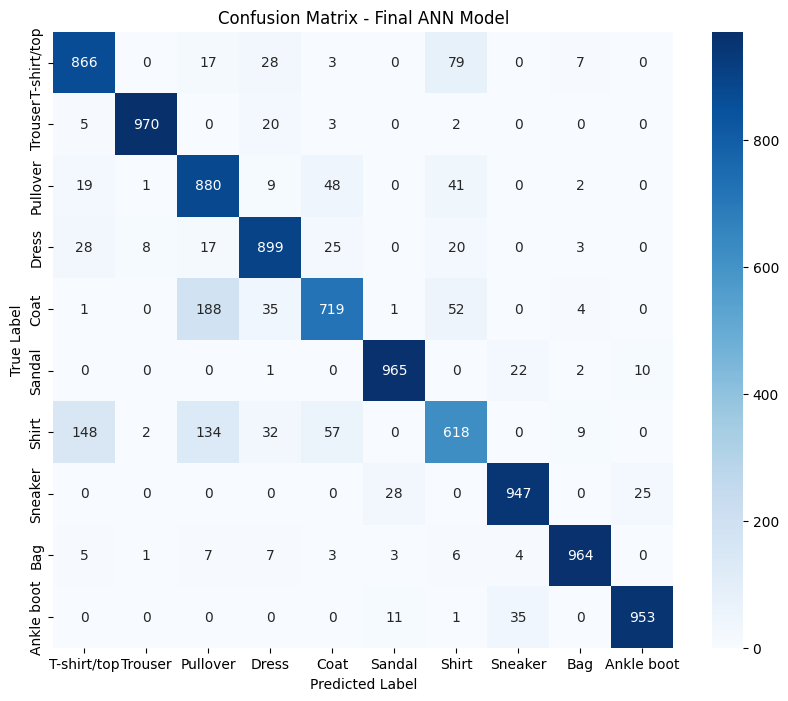

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


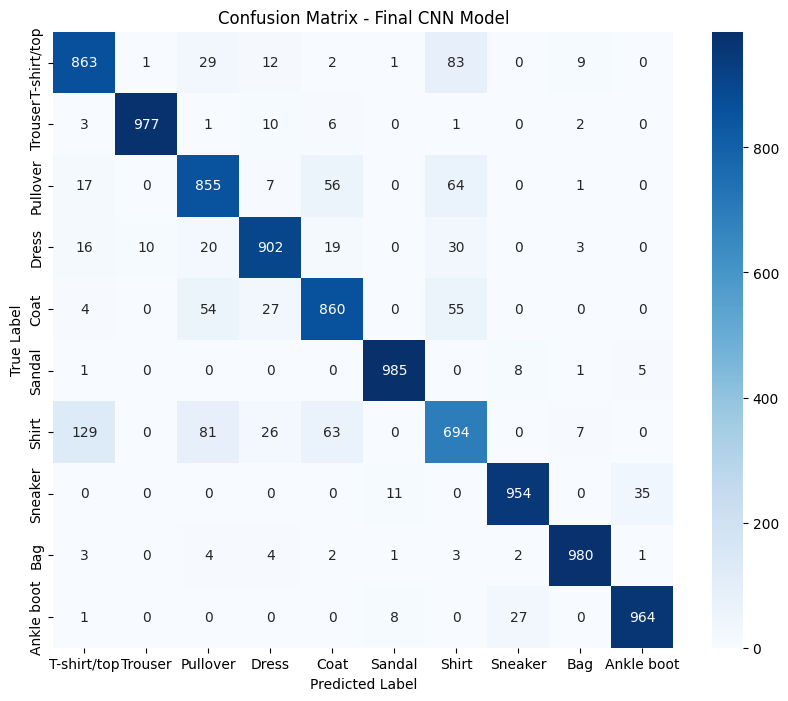

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the final ANN model
predictions_ann_final = np.argmax(ann_model_final.predict(test_images), axis=1)

# Compute confusion matrix for the final ANN model
ann_cm_final = confusion_matrix(test_labels, predictions_ann_final)

# Display the confusion matrix for ANN
plt.figure(figsize=(10, 8))
sns.heatmap(ann_cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Final ANN Model')
plt.show()

# Get predictions for the final CNN model
predictions_cnn_final = np.argmax(cnn_model_final.predict(test_images), axis=1)

# Compute confusion matrix for the final CNN model
cnn_cm_final = confusion_matrix(test_labels, predictions_cnn_final)

# Display the confusion matrix for CNN
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Final CNN Model')
plt.show()

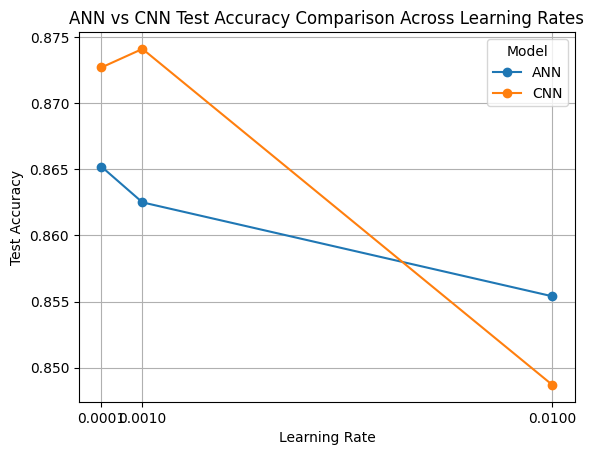

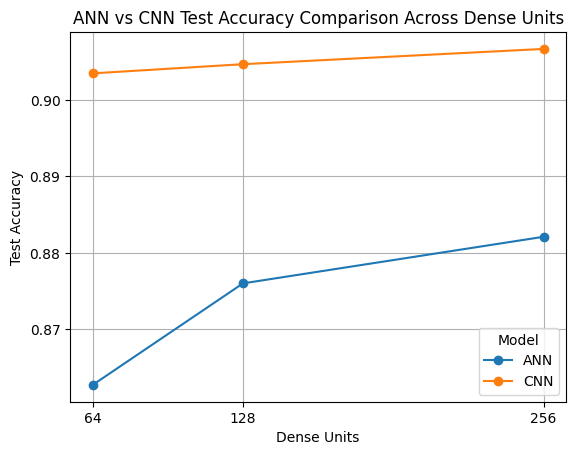

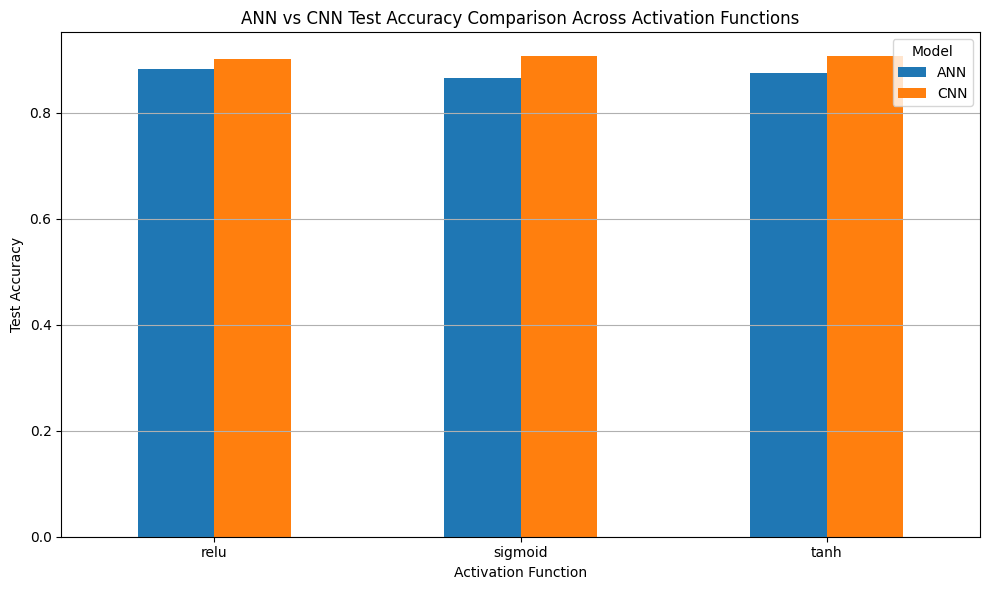

In [ ]:
import matplotlib.pyplot as plt

# Plot the line graph comparing ANN and CNN accuracies across different learning rates
if 'pivot_accuracies_df_lr' in locals():
    pivot_accuracies_df_lr.plot(kind='line', marker='o')
    plt.title('ANN vs CNN Test Accuracy Comparison Across Learning Rates')
    plt.xlabel('Learning Rate')
    plt.ylabel('Test Accuracy')
    plt.grid(True)
    plt.xticks(pivot_accuracies_df_lr.index)
    plt.legend(title='Model')
    plt.show()
else:
    print("Learning rate accuracy data not available. Please run the relevant cells.")

# Plot the line graph comparing ANN and CNN accuracies across different dense units
if 'pivot_accuracies_df_dense' in locals():
    pivot_accuracies_df_dense.plot(kind='line', marker='o')
    plt.title('ANN vs CNN Test Accuracy Comparison Across Dense Units')
    plt.xlabel('Dense Units')
    plt.ylabel('Test Accuracy')
    plt.grid(True)
    plt.xticks(pivot_accuracies_df_dense.index)
    plt.legend(title='Model')
    plt.show()
else:
    print("Dense unit accuracy data not available. Please run the relevant cells.")

# Plot the bar graph comparing ANN and CNN accuracies across different activation functions
# Using a bar plot is better here as activation functions are categorical
if 'pivot_accuracies_df_activation' in locals():
    pivot_accuracies_df_activation.plot(kind='bar', figsize=(10, 6))
    plt.title('ANN vs CNN Test Accuracy Comparison Across Activation Functions')
    plt.xlabel('Activation Function')
    plt.ylabel('Test Accuracy')
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()
else:
    print("Activation function accuracy data not available. Please run the relevant cells.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Sample Predictions (ANN):


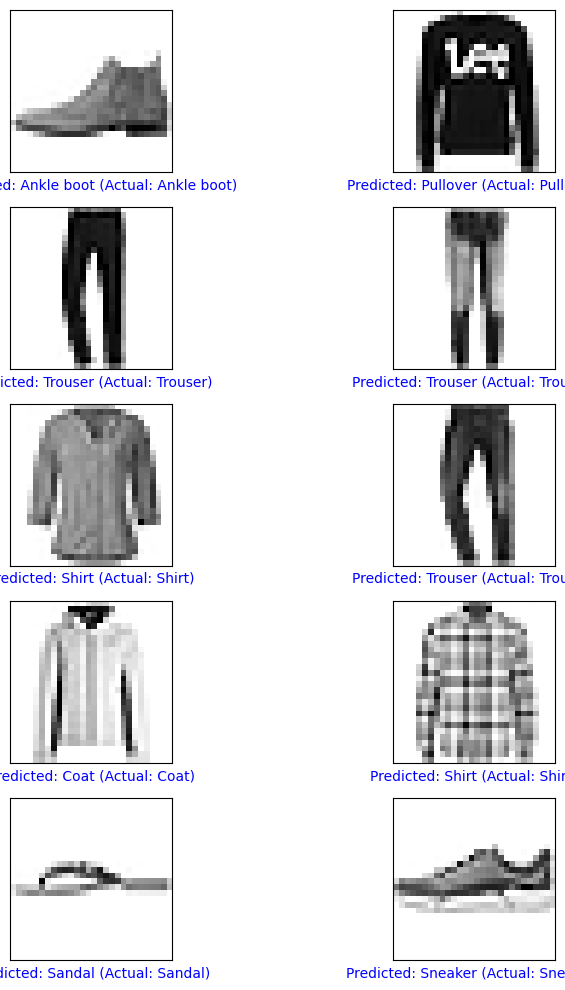

In [ ]:
# Make predictions on the test set
predictions_ann = ann_model_final.predict(test_images)

# Display some sample predictions and their corresponding actual labels with images
print("\nSample Predictions (ANN):")
plt.figure(figsize=(10, 10))
for i in range(10): # Display the first 10 predictions
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].squeeze(), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_ann[i])
    actual_label = test_labels[i]
    color = 'blue' if predicted_label == actual_label else 'red'
    plt.xlabel(f"Predicted: {class_names[predicted_label]} (Actual: {class_names[actual_label]})", color=color)
plt.tight_layout()
plt.show()